In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

Let's imagine that we are profiling a population of people. Some people are healthy, and some have covid. A priori, we don't know how many people are healthy. 

We want to estimate the population proportions based on the number of detected nucleocapsid counts $m$.

We will model the nucleocapsid counts as Poisson distributed. We know the mean nucleocapsid counts for healthy and covid people. $\lambda_h = .1$ and $\lambda_c = 12$ respectevely. 

Therefore the whole population is a mixture of two subpopulations (healthy and covid), which justifies our use of a Poisson mixture model. The parameter $w$ represents the fraction of healthy people, and $(1 − w)$ is the fraction of covid positive people.

$$P(m \mid \lambda_h, \lambda_c, w) = w\left(\frac{e^{-\lambda_h}\lambda_h^m}{m!}\right) + (1 - w)\left(\frac{e^{-\lambda_c}\lambda_c^m}{m!}\right)$$


In [2]:
# First let's code a generic Poisson distribution that we can reuse:
def poisson(k, lambda_):
  return ((np.exp(-lambda_))*(lambda_**k))/(factorial(k))

In [3]:
# Now we can define our Poisson Mixture model:
def mixture_model(w, lambda_1, lambda_2, x):
  return w*poisson(x,lambda_1) + (1-w)*poisson(x,lambda_2)

Now, we will assume that we have a uniform prior and go directly to the likelihood maximization. Remember, we want to estimate $w$.

In the case, we only observed one sample $m_1$ we have:

$$\begin{eqnarray}
L(w \mid m_1, \lambda_h, \lambda_c,) &=& \log P(m_1 \mid\lambda_h, \lambda_c, w) \\
&=& \log\left(w\left(\frac{e^{-\lambda_h}\lambda_{h}^{m_1}}{m_1!}\right) + (1 - w)\left(\frac{e^{-\lambda_c}\lambda_{c}^{m_1}}{m_1!}\right)\right)
\end{eqnarray}$$

In general, given a set of observations $M = \{m_i\}$ now we want to find the posterior probability of $w$ given $M$. We consider:

$$\begin{eqnarray}
L(w \mid m_1, m_2, \ldots, m_i, \lambda_h, \lambda_c) &=& \log\prod_{i}P(m_i \mid \lambda_h, \lambda_c, w) \\
&=& \sum_{i} \log P(m_i \mid \lambda_h, \lambda_c, w)\\ 
&=& \sum_{i} \log\left(w\left(\frac{e^{-\lambda_h}\lambda_{h}^{m_i}}{m_i!}\right) + (1 - w)\left(\frac{e^{-\lambda_c}\lambda_{c}^{m_i}}{m_i!}\right)\right)
\end{eqnarray}$$

Let's code the Log-likelihood function, performing the summation in a `for` loop:

In [4]:
def log_likelihood(w, lambda_1, lambda_2, M):
  result = 0
  for m_i in M:
    result += np.log(mixture_model(w,lambda_1, lambda_2, m_i))
  return result

In [5]:
# Our Observed Dataset
M = [8, 0, 0, 0, 0, 7, 15, 20, 7, 0, 0, 0, 0, 0, 0]
w = np.linspace(0,1)

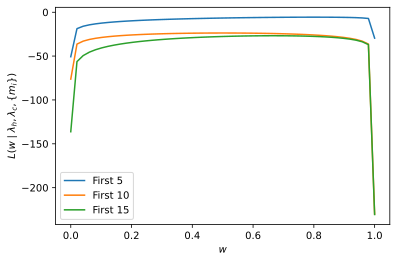

In [6]:
plt.plot(w, log_likelihood(w, .1, 12, M[:5]), label = 'First 5')
plt.plot(w, log_likelihood(w, .1, 12, M[:10]), label = 'First 10')
plt.plot(w, log_likelihood(w, .1, 12, M[:15]), label = 'First 15')
plt.xlabel('$w$')
plt.ylabel('$L(w \mid \lambda_h, \lambda_c, \{m_i\})$')
plt.legend()

In [7]:
print('Proportion of healthy people in population given first 5 data points =', w[np.argmax(log_likelihood(w, .1, 12, M[:5]))])
print('Proportion of healthy people in population given first 10 data points =', w[np.argmax(log_likelihood(w, .1, 12, M[:10]))])
print('Proportion of healthy people in population given first 15 data points =', w[np.argmax(log_likelihood(w, .1, 12, M[:15]))])

Proportion of healthy people in population given first 5 data points = 0.7959183673469387
Proportion of healthy people in population given first 10 data points = 0.4897959183673469
Proportion of healthy people in population given first 15 data points = 0.673469387755102
